In [142]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
from scipy import stats

senic_df = pd.read_csv('./senic.csv')
senic_df = senic_df.drop(['id'], axis=1)

senic_df = senic_df[['infection_risk','stay_length', 'age','culture_ratio', 'chest_ratio',
                     'bed_count', 'med_school', 'region', 'avg_daily_census', 'nurse_count',
                     'available_services']]


In [143]:
senic_columns = senic_df.columns

y = 'infection_risk'
x = " + ".join([i for i in senic_columns if  i != y])

In [144]:
fit = ols(y + '~' + x, 
            data=senic_df).fit()

print(fit.summary())

senic_df['resids'] = fit.resid
senic_df['sq_resids'] = fit.resid**2
stud_res = fit.outlier_test()
senic_df['studentized_resids'] = stud_res['student_resid']
senic_df['yhat'] = fit.predict()



                            OLS Regression Results                            
Dep. Variable:         infection_risk   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     13.51
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           7.97e-15
Time:                        20:46:57   Log-Likelihood:                -145.34
No. Observations:                 113   AIC:                             312.7
Df Residuals:                     102   BIC:                             342.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.2400      1

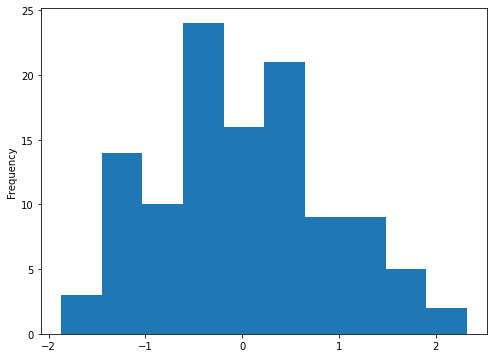

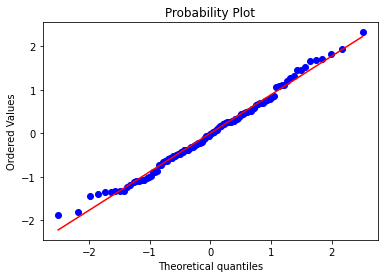

Shapiro Statistic: 0.989
Data appears to be normal with p-value: 0.475


In [145]:



def residual_plots(x, y, xlabel, ylabel):

    plt.scatter(x, y)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    
def normality_output(data):
    shapiro_output = stats.shapiro(data)
    shapiro_stat = shapiro_output[0]
    shapiro_p = shapiro_output[1]
    print("Shapiro Statistic: {:.3f}".format(shapiro_stat))
    if shapiro_p < 0.05:
        print('Data is non-normal with p-value: {:.5f}'.format(shapiro_p))
    else:
        print('Data appears to be normal with p-value: {:.3f}'.format(shapiro_p))
        
        
    return shapiro_output

### Test normality of residuals!

plt.figure(figsize=(8, 6))

senic_df['resids'].plot(kind='hist');

fig = plt.figure()
ax1 = fig.add_subplot(111)
prob = stats.probplot(senic_df['resids'], dist=stats.norm, plot=ax1)
plt.show();

shapiro_stats = normality_output(senic_df['resids'])




## Raw Residual Plots

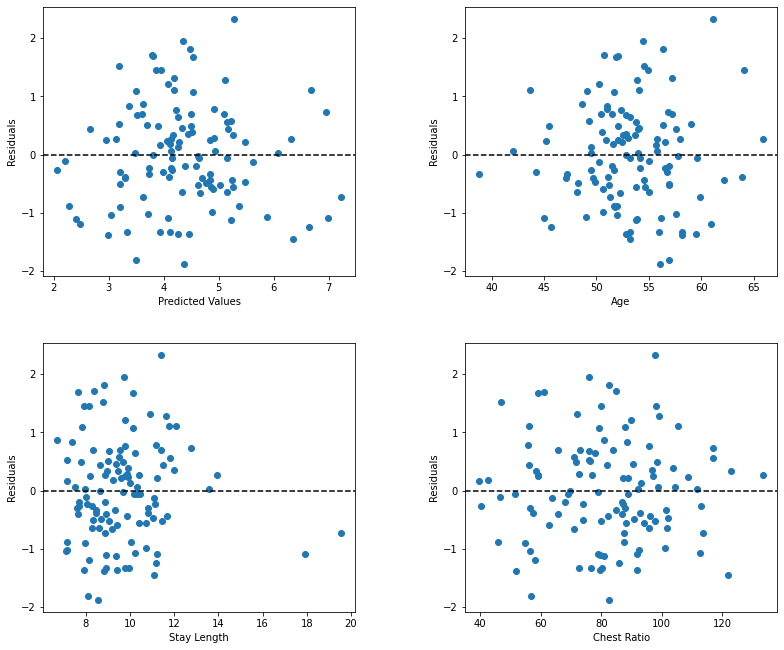

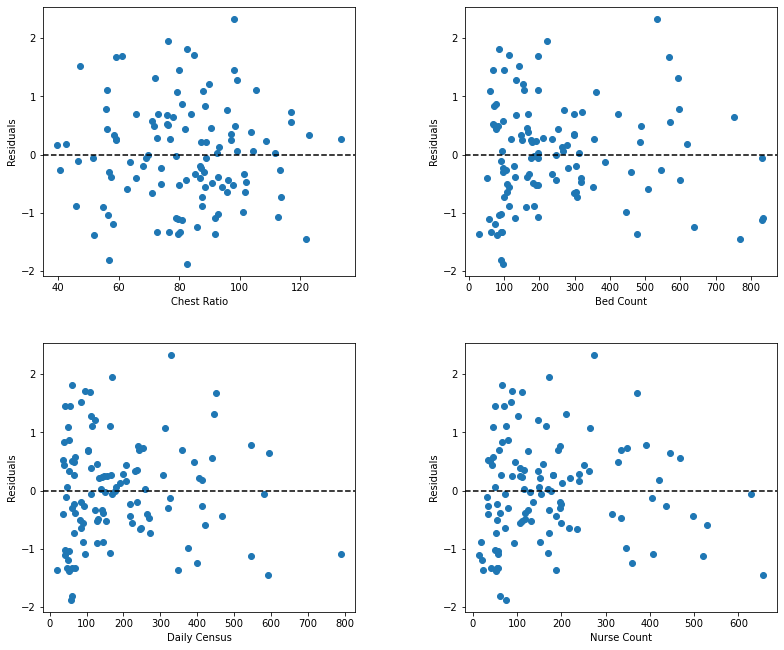

In [137]:
plt.figure(figsize=(12, 10))


plt.subplot(221)
residual_plots(senic_df['yhat'], senic_df['resids'], 'Predicted Values', 'Residuals')
plt.subplot(222)
residual_plots(senic_df['age'], senic_df['resids'], 'Age', 'Residuals')
plt.subplot(223)
residual_plots(senic_df['stay_length'], senic_df['resids'], 'Stay Length', 'Residuals')
plt.subplot(224)
residual_plots(senic_df['chest_ratio'], senic_df['resids'], 'Chest Ratio', 'Residuals')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

plt.figure(figsize=(12, 10))


plt.subplot(221)
residual_plots(senic_df['chest_ratio'], senic_df['resids'], 'Chest Ratio', 'Residuals')
plt.subplot(222)
residual_plots(senic_df['bed_count'], senic_df['resids'], 'Bed Count', 'Residuals')
plt.subplot(223)
residual_plots(senic_df['avg_daily_census'], senic_df['resids'], 'Daily Census', 'Residuals')
plt.subplot(224)
residual_plots(senic_df['nurse_count'], senic_df['resids'], 'Nurse Count', 'Residuals')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

## Squared Residuals

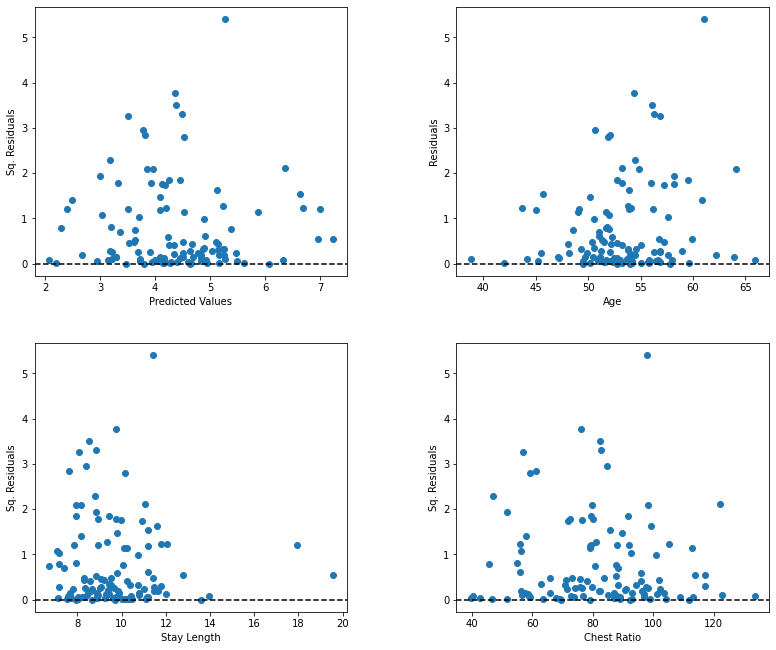

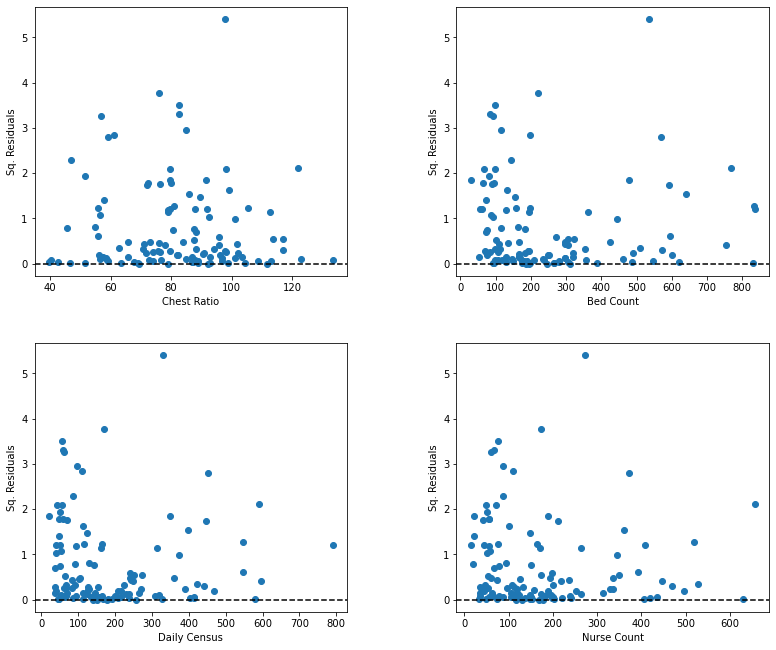

In [138]:
plt.figure(figsize=(12, 10))


plt.subplot(221)
residual_plots(senic_df['yhat'], senic_df['sq_resids'], 'Predicted Values', 'Sq. Residuals')
plt.subplot(222)
residual_plots(senic_df['age'], senic_df['sq_resids'], 'Age', 'Residuals')
plt.subplot(223)
residual_plots(senic_df['stay_length'], senic_df['sq_resids'], 'Stay Length', 'Sq. Residuals')
plt.subplot(224)
residual_plots(senic_df['chest_ratio'], senic_df['sq_resids'], 'Chest Ratio', 'Sq. Residuals')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

plt.figure(figsize=(12, 10))

plt.subplot(221)
residual_plots(senic_df['chest_ratio'], senic_df['sq_resids'], 'Chest Ratio', 'Sq. Residuals')
plt.subplot(222)
residual_plots(senic_df['bed_count'], senic_df['sq_resids'], 'Bed Count', 'Sq. Residuals')
plt.subplot(223)
residual_plots(senic_df['avg_daily_census'], senic_df['sq_resids'], 'Daily Census', 'Sq. Residuals')
plt.subplot(224)
residual_plots(senic_df['nurse_count'], senic_df['sq_resids'], 'Nurse Count', 'Sq. Residuals')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

## Studentized Residuals

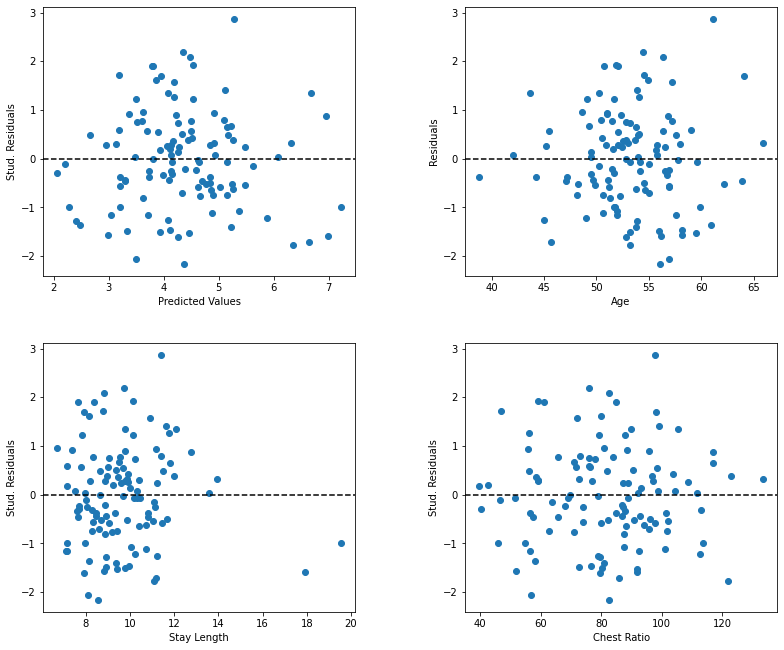

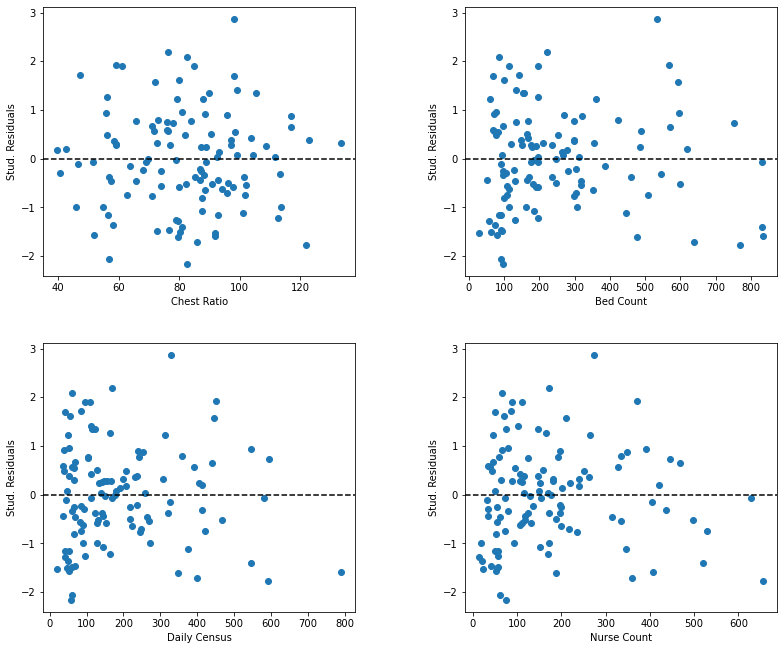

In [139]:
plt.figure(figsize=(12, 10))


plt.subplot(221)
residual_plots(senic_df['yhat'], senic_df['studentized_resids'], 'Predicted Values', 'Stud. Residuals')
plt.subplot(222)
residual_plots(senic_df['age'], senic_df['studentized_resids'], 'Age', 'Residuals')
plt.subplot(223)
residual_plots(senic_df['stay_length'], senic_df['studentized_resids'], 'Stay Length', 'Stud. Residuals')
plt.subplot(224)
residual_plots(senic_df['chest_ratio'], senic_df['studentized_resids'], 'Chest Ratio', 'Stud. Residuals')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

plt.figure(figsize=(12, 10))

plt.subplot(221)
residual_plots(senic_df['chest_ratio'], senic_df['studentized_resids'], 'Chest Ratio', 'Stud. Residuals')
plt.subplot(222)
residual_plots(senic_df['bed_count'], senic_df['studentized_resids'], 'Bed Count', 'Stud. Residuals')
plt.subplot(223)
residual_plots(senic_df['avg_daily_census'], senic_df['studentized_resids'], 'Daily Census', 'Stud. Residuals')
plt.subplot(224)
residual_plots(senic_df['nurse_count'], senic_df['studentized_resids'], 'Nurse Count', 'Stud. Residuals')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

## Breusch Pagan

Null Hypothesis: Homoscedasticity is present
Alternative Hypothesis: Homoscedasticity is not present

Because p > 0.05 we fail to reject the null hypothesis and conclude there is not enough evidence that heteroscadacity is present


In [146]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 14.396656609947232),
 ('p-value', 0.1556554188077192),
 ('f-value', 1.4892588057645502),
 ('f p-value', 0.15407381585612284)]